In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sq

## connection

In [64]:
db =  sq.connect('../data/checking-logs.sqlite.sqlite')

## query

In [65]:
query = 'SELECT timestamp FROM checker WHERE uid LIKE "user_%";'
df = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])

In [72]:
df['date'] = df.timestamp.dt.floor('d')
df['hour'] = df.timestamp.dt.hour
df_work = df[df['date'].dt.dayofweek < 5]
df_week = df[df['date'].dt.dayofweek >= 5]
df1 = list(df_work.hour)
df2 = list(df_week.hour)

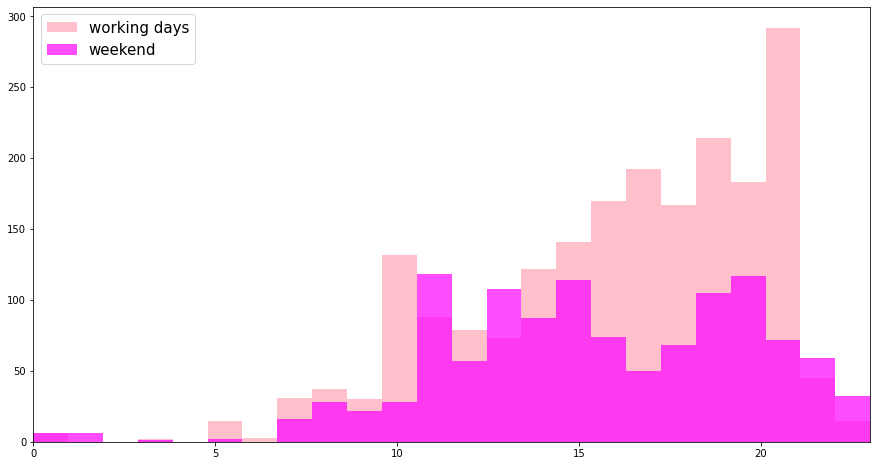

In [80]:
fig, axs = plt.subplots(figsize=(15, 8))
axs.hist(df1, bins=24, label='working days', color='pink')
axs.hist(df2, bins=24, label='weekend', color='magenta', alpha=0.7)
axs.set_xlim(0,23)
axs.legend(fontsize=15)


In [ ]:
db.close()

## “Are there hours when the total number of commits was higher on weekends than on working days?”  1, 11, 13, 23